## Zeta Disease Prediction 
We are creating a good data-driven system for predicting Zeta Disease infection on the International Mars Colony for Mars Mission Control.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

Loading the data

In [3]:
zeta_data = pd.read_csv("2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv")

### Exploratory Data Analysis (EDA)


The goal here is to find out more about the data and become an expert on the dataset we are working with.

What questions are you trying to solve?  
What kind of data do we have and how do we treat different types?  
What's missing from the data and how do you deal with it?  
Where are the outliers and why should you care about them?  
How can you add, change or remove features to get more out of your data?

In [10]:
# Let's see the head of our dataset
zeta_data.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [11]:
# Let's check the dimensions of the dataframe
zeta_data.shape

(800, 9)

In [12]:
# let's look at the statistical aspects of the dataframe
zeta_data.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [13]:
# Let's see the type of each column
zeta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
age                   800 non-null int64
weight                800 non-null int64
bmi                   800 non-null float64
blood_pressure        800 non-null int64
insulin_test          800 non-null int64
liver_stress_test     800 non-null float64
cardio_stress_test    800 non-null int64
years_smoking         800 non-null int64
zeta_disease          800 non-null int64
dtypes: float64(2), int64(7)
memory usage: 56.3 KB


In [14]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
zeta_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
90%,49.000000,218.000000,42.010000,88.000000,215.000000,0.954900,71.000000,9.000000,1.000000
95%,57.000000,233.000000,44.620000,92.000000,310.400000,1.207300,75.000000,11.000000,1.000000
99%,78.210000,247.000000,53.218000,110.000000,543.020000,1.762120,90.030000,14.000000,1.000000


In [4]:
#Filter the values with greater than 99 percentile of the cardio_stress_test
zeta_data1 = zeta_data[zeta_data['cardio_stress_test'] > 100]
zeta_data1

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
149,26,161,28.4,90,78,0.5578,186,3,0
236,20,169,34.9,64,92,0.7878,160,0,0
438,48,216,25.8,72,175,0.6498,181,5,1
442,21,221,33.3,72,135,0.2618,214,3,1
452,53,161,37.1,72,207,1.4528,169,4,1
491,59,247,34.7,70,0,0.6378,129,2,1
597,26,208,39.4,84,210,0.4578,164,5,1


In [5]:
#Filter the values with greater than 99 percentile of the insulin_test
zeta_data1 = zeta_data[zeta_data['insulin_test'] > 550]
zeta_data1

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
3,18,150,30.8,70,1033,0.6598,56,0,0
310,28,247,36.7,70,744,2.3918,69,4,0
338,20,215,52.3,90,680,0.4898,63,0,0
465,49,174,28.7,76,600,0.7498,54,8,1
643,27,170,42.9,70,1077,0.5148,60,3,0
743,25,222,42.4,68,579,0.7648,79,1,1
792,56,239,30.1,60,846,0.4608,53,1,1


Though there is an extreme value of 214 as max and 99% as 90 for cardio_stress_test, its not an outlier  
Though there is an extreme value of 1077 as max and 99% as 543 for insulin_test, its not an outlier  
From the distribution shown for outliers, you can see that there no outliers in your data. The numbers are gradually increasing.

In [61]:
# Adding up the missing values (column-wise)
zeta_data.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

We have awesome structured data where there are no null values

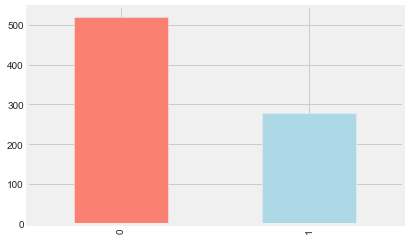

In [62]:
zeta_data.zeta_disease.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

We have 521 person without zeta disease and 279 person with heart disease, so our problem is partially balanced. 

In [64]:
# The classes are heavily skewed we need to solve this issue later.
print('No Disease', round(zeta_data['zeta_disease'].value_counts()[0]/len(zeta_data) * 100,2), '% of the dataset')
print('Zeta Disease', round(zeta_data['zeta_disease'].value_counts()[1]/len(zeta_data) * 100,2), '% of the dataset')

No Disease 65.12 % of the dataset
Zeta Disease 34.88 % of the dataset


In [17]:
categorical_val = []
continous_val = []
for column in zeta_data.columns:
    print('==============================')
    print(f"{column} : {zeta_data[column].unique()}")
    if len(zeta_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [ 54  23  47  18  24  49  20  37  21  19  25  29  46  39  22  50  27  67
  28  55  66  42  57  48  35  31  33  34  56 104  30  63 109  43  44  58
  41  26  38  51  45  32  52  60  99  64  40  36  62 102  69  53  59  61
  65  78]
weight : [189 150 186 160 158 154 167 162 177 172 149 175 199 169 152 195 123 161
 130 233 141 215 190 229 198 225 143 173 125 159 156 205 145 137 214 204
 244 187 131 197 179 208 139 176 117 153 192 180 292 118 240 174 196 178
 226 165 136 194 247 142 138 155 243 203 151 231 188 140 193 184 133 200
 170 127 191 201 213 245 164 230 146 166 157 183 147 128 135 211 246 171
 206 121 168 144 185 216 212 295 234 218 181 202 112 163 220 223 182 148
 236 106 207 124 132 115 126 129 134 224 228 107 237 221 209 111 122 238
 217 283 241 239  94 308 249 232 219 248 210 222 227]
bmi : [27.1 38.5 29.9 30.8 32.4 27.  27.8 34.5 34.8 31.2 36.8 29.  27.6 29.3
 35.5 45.5 30.3 26.8 24.  25.6 26.  19.1 32.5 23.3 29.8 23.6  0.  30.4
 32.7 34.2 37.6 33.6 38.  32.  33.3 26.6 25

In [18]:
categorical_val

['zeta_disease']

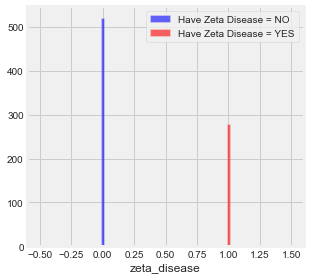

In [19]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    zeta_data[zeta_data["zeta_disease"] == 0][column].hist(bins=35, color='blue', label='Have Zeta Disease = NO', alpha=0.6)
    zeta_data[zeta_data["zeta_disease"] == 1][column].hist(bins=35, color='red', label='Have Zeta Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [23]:
continous_val

['age',
 'weight',
 'bmi',
 'blood_pressure',
 'insulin_test',
 'liver_stress_test',
 'cardio_stress_test',
 'years_smoking']

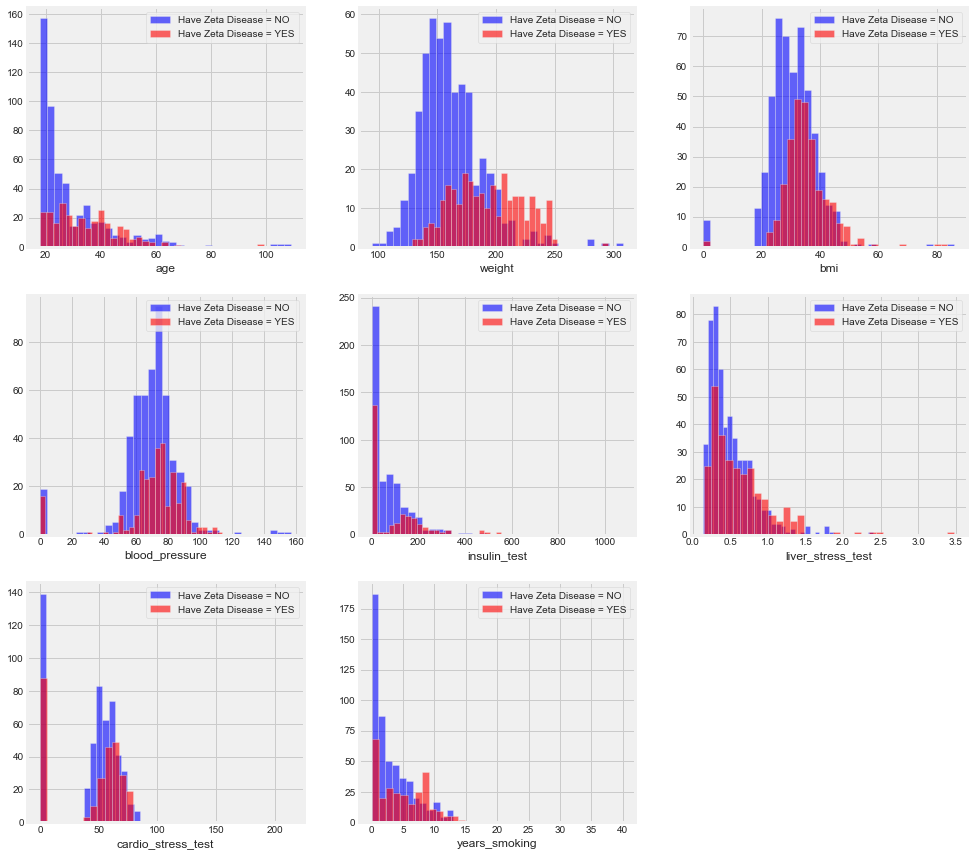

In [21]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    zeta_data[zeta_data["zeta_disease"] == 0][column].hist(bins=35, color='blue', label='Have Zeta Disease = NO', alpha=0.6)
    zeta_data[zeta_data["zeta_disease"]  == 1][column].hist(bins=35, color='red', label='Have Zeta Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

age: People who are above 40 years are more prone to Zeta Disease  
weight : People with weight (body weight in pounds (lbs)) greater than 200 are more likely to have Zeta Diesease  
bmi : People with Body Mass Index (weight in kg/(height in m)2) gretaer than 40 are more prone to Zeta Disease  
liver_stress_test : People with liver_stress_test value greater than 0.9 are more likely to have Zeta Disease  
cardio_stress_test : People with cardio_stress_test value gretaer than 70 are more prone to Zeta Disease    
years_smoking : People who are smoking for more than 7 years are more prone to Zeta Disease     

Age Vs Liver Stress Test for Zeta Disease

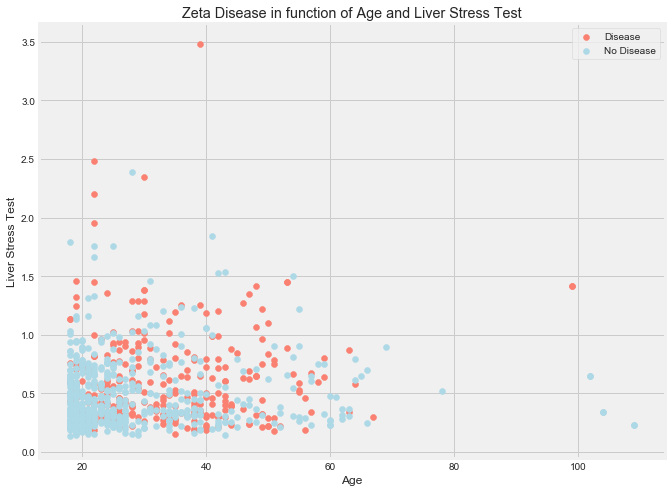

In [24]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(zeta_data.age[zeta_data["zeta_disease"]==1],
            zeta_data.liver_stress_test[zeta_data["zeta_disease"]==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(zeta_data.age[zeta_data["zeta_disease"]==0],
            zeta_data.liver_stress_test[zeta_data["zeta_disease"]==0],
            c="lightblue")

# Add some helpful info
plt.title("Zeta Disease in function of Age and Liver Stress Test")
plt.xlabel("Age")
plt.ylabel("Liver Stress Test")
plt.legend(["Disease", "No Disease"]);

Age Vs Cardio Stress Test for Zeta Disease

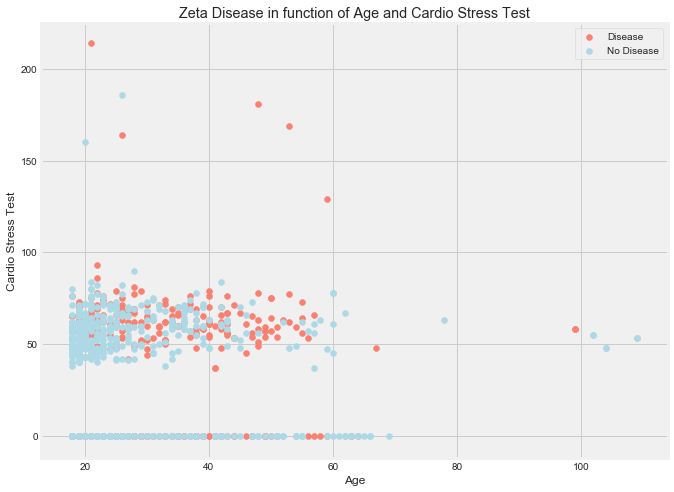

In [25]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(zeta_data.age[zeta_data["zeta_disease"]==1],
            zeta_data.cardio_stress_test[zeta_data["zeta_disease"]==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(zeta_data.age[zeta_data["zeta_disease"]==0],
            zeta_data.cardio_stress_test[zeta_data["zeta_disease"]==0],
            c="lightblue")

# Add some helpful info
plt.title("Zeta Disease in function of Age and Cardio Stress Test")
plt.xlabel("Age")
plt.ylabel("Cardio Stress Test")
plt.legend(["Disease", "No Disease"]);

###  Correlations

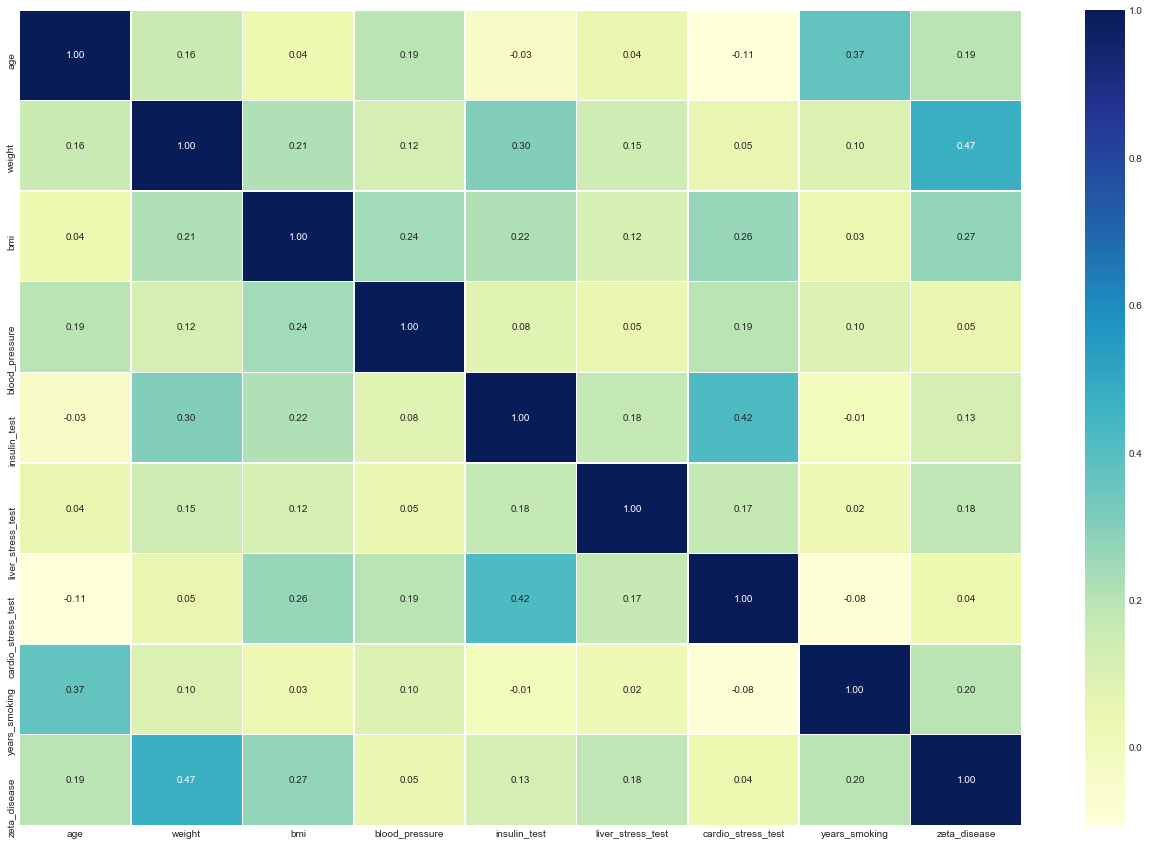

In [28]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(zeta_data.corr(),annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")
plt.show()

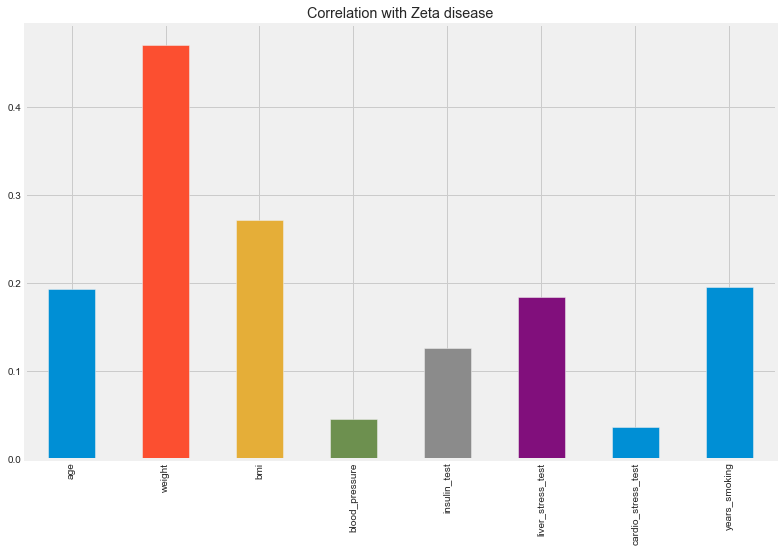

In [30]:
#Correlation with Zeta_disease
zeta_data.drop('zeta_disease', axis=1).corrwith(zeta_data.zeta_disease).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with Zeta disease")

blood_pressure and cardio_stress_test are the lowest correlated with the target variable    
All other variables have a significant correlation with the target variable  

### Data Processing

In [8]:
#Test-Train Split
from sklearn.model_selection import train_test_split

In [9]:
# Putting feature variable to X
X = zeta_data.drop(['zeta_disease'], axis=1)

X.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,54,189,27.1,80,0,1.5038,0,10
1,23,150,38.5,68,71,0.3868,55,2
2,47,186,29.9,90,0,0.2728,0,7
3,18,150,30.8,70,1033,0.6598,56,0
4,24,160,32.4,74,125,0.7608,59,2


In [10]:
# Putting response variable to y
y = zeta_data['zeta_disease']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: zeta_disease, dtype: int64

In [34]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [35]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
col_to_scale = ['age','weight','bmi','blood_pressure','insulin_test','liver_stress_test','cardio_stress_test','years_smoking']

X_train[col_to_scale] = scaler.fit_transform(X_train[col_to_scale])

X_train.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
650,1.170130,0.141505,0.762011,1.844850,-0.691718,-0.898593,-1.391625,1.729302
529,-0.668538,-1.258546,-0.427493,-0.838052,0.268091,3.676063,0.297162,-0.521068
651,-0.597820,1.821567,1.249141,0.950549,3.564827,-0.801583,1.011648,-1.021150
749,-0.668538,-0.916312,0.342852,-0.440585,-0.691718,-0.677288,-1.391625,-1.021150
652,-0.880692,-0.854087,-0.948609,-0.440585,-0.207641,-0.686383,0.167255,-0.771109


In [37]:
#Checking the infected Rate
infectedRate = (sum(zeta_data['zeta_disease'])/len(zeta_data['zeta_disease'].index))*100
infectedRate

34.875

We have almost 35% infected rate

We need to balance the dataset, lets try without balacing the data first

### Applying Machine Learning Algorithms

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try different machine learning models:

Logistic Regression  
K-Nearest Neighbours Classifier  
Support Vector machine  
Decision Tree Classifier  
Random Forest Classifier  
XGBoost Classifier

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 77.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.831579    0.644444    0.771429    0.738012      0.764745
precision    0.790000    0.725000    0.771429    0.757500      0.766786
recall       0.877778    0.580000    0.771429    0.728889      0.771429
support    360.000000  200.000000  560.000000  560.000000    560.000000
_______________________________________________
Confusion Matrix: 
 [[316  44]
 [ 84 116]]

Test Result:
Accuracy Score: 32.92%
_______________________________________________
CLASSIFICATION REPORT:
               0          1   micro avg   macro avg  weighted avg
f1-score     0.0   0.495298    0.329167    0.247649      0.163036
precision    0.0   0.329167    0.329167    0.164583      0.108351
recall       0.0   1.000000    0.329167    0.500000      0.329167
support    161.0  79.000000  240.000000  240.000000    240.000000
___

In [40]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,77.142857,32.916667


#### K-nearest neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 80.89%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.857523    0.710027    0.808929    0.783775      0.804846
precision    0.823529    0.775148    0.808929    0.799339      0.806250
recall       0.894444    0.655000    0.808929    0.774722      0.808929
support    360.000000  200.000000  560.000000  560.000000    560.000000
_______________________________________________
Confusion Matrix: 
 [[322  38]
 [ 69 131]]

Test Result:
Accuracy Score: 37.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  micro avg   macro avg  weighted avg
f1-score     0.202128   0.486301      0.375    0.344215      0.295668
precision    0.703704   0.333333      0.375    0.518519      0.581790
recall       0.118012   0.898734      0.375    0.508373      0.375000
support    161.000000  79.000000    240.000  240.0000

In [42]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,77.142857,32.916667
1,K-nearest neighbors,80.892857,37.500000


#### Support Vector machine

In [43]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.861619    0.700565    0.810714    0.781092      0.804100
precision    0.812808    0.805195    0.810714    0.809001      0.810089
recall       0.916667    0.620000    0.810714    0.768333      0.810714
support    360.000000  200.000000  560.000000  560.000000    560.000000
_______________________________________________
Confusion Matrix: 
 [[330  30]
 [ 76 124]]

Test Result:
Accuracy Score: 67.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1   micro avg   macro avg  weighted avg
f1-score     0.802993   0.0    0.670833    0.401496      0.538674
precision    0.670833   0.0    0.670833    0.335417      0.450017
recall       1.000000   0.0    0.670833    0.500000      0.670833
support    161.000000  79.0  240.000000  240.000000    240.000000
___

In [44]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,77.142857,32.916667
1,K-nearest neighbors,80.892857,37.500000
2,Support Vector Machine,81.071429,67.083333


#### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  micro avg  macro avg  weighted avg
f1-score     1.0    1.0        1.0        1.0           1.0
precision    1.0    1.0        1.0        1.0           1.0
recall       1.0    1.0        1.0        1.0           1.0
support    360.0  200.0      560.0      560.0         560.0
_______________________________________________
Confusion Matrix: 
 [[360   0]
 [  0 200]]

Test Result:
Accuracy Score: 66.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1  micro avg   macro avg  weighted avg
f1-score     0.796992   0.0     0.6625    0.398496      0.534649
precision    0.668067   0.0     0.6625    0.334034      0.448162
recall       0.987578   0.0     0.6625    0.493789      0.662500
support    161.000000  79.0   240.0000  240.000000    240.000000
_______________________________________________
Confusion Matrix: 


In [46]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,77.142857,32.916667
1,K-nearest neighbors,80.892857,37.500000
2,Support Vector Machine,81.071429,67.083333
3,Decision Tree Classifier,100.000000,66.250000


#### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  micro avg  macro avg  weighted avg
f1-score     1.0    1.0        1.0        1.0           1.0
precision    1.0    1.0        1.0        1.0           1.0
recall       1.0    1.0        1.0        1.0           1.0
support    360.0  200.0      560.0      560.0         560.0
_______________________________________________
Confusion Matrix: 
 [[360   0]
 [  0 200]]

Test Result:
Accuracy Score: 32.92%
_______________________________________________
CLASSIFICATION REPORT:
               0          1   micro avg   macro avg  weighted avg
f1-score     0.0   0.495298    0.329167    0.247649      0.163036
precision    0.0   0.329167    0.329167    0.164583      0.108351
recall       0.0   1.000000    0.329167    0.500000      0.329167
support    161.0  79.000000  240.000000  240.000000    240.000000
_______________________________________________
Confusion Matr

In [48]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,77.142857,32.916667
1,K-nearest neighbors,80.892857,37.500000
2,Support Vector Machine,81.071429,67.083333
3,Decision Tree Classifier,100.000000,66.250000
4,Random Forest Classifier,100.000000,32.916667


#### XGBoost Classifer

In [49]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

[17:38:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  micro avg  macro avg  weighted avg
f1-score     1.0    1.0        1.0        1.0           1.0
precision    1.0    1.0        1.0        1.0           1.0
recall       1.0    1.0        1.0        1.0           1.0
support    360.0  200.0      560.0      560.0         560.0
_______________________________________________
Confusion Matrix: 
 [[360   0]
 [  0 200]]

Test Result:
Accuracy Score: 33.75%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  micro avg   macro avg  weighted avg
f1-score    

In [50]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,77.142857,32.916667
1,K-nearest neighbors,80.892857,37.500000
2,Support Vector Machine,81.071429,67.083333
3,Decision Tree Classifier,100.000000,66.250000
4,Random Forest Classifier,100.000000,32.916667
5,XGBoost Classifier,100.000000,33.750000


### Applying Machine Learning Algorithms Using Hyperparameter Tuning

#### Logistic Regression Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters: {'C': 0.08858667904100823, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 76.79%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.829396    0.636872    0.767857    0.733134      0.760637
precision    0.786070    0.721519    0.767857    0.753794      0.763016
recall       0.877778    0.570000    0.767857    0.723889      0.767857
support    360.000000  200.000000  560.000000  560.000000    560.000000
_______________________________________________
Confusion Matrix: 
 [[316  44]
 [ 86 114]]

Test Result:
Accuracy Score: 32.92%
_______________________________________________
CLASSIFICATION REPORT:
               0          1   micro avg   macro avg  weighted avg
f1-score     0.0   0.495298    0.329167    0.247649      0.163036
precision    0.0   0.329167    0.329167    0.164583      0.108351
recall       0.0   1.000000    0.329167    0.500000      0.329167
su

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.6s finished


In [160]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,75.0,32.916667


#### K-nearest neighbors Hyperparameter Tuning

In [53]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))

Maximum KNN score on the test data: 100.00%


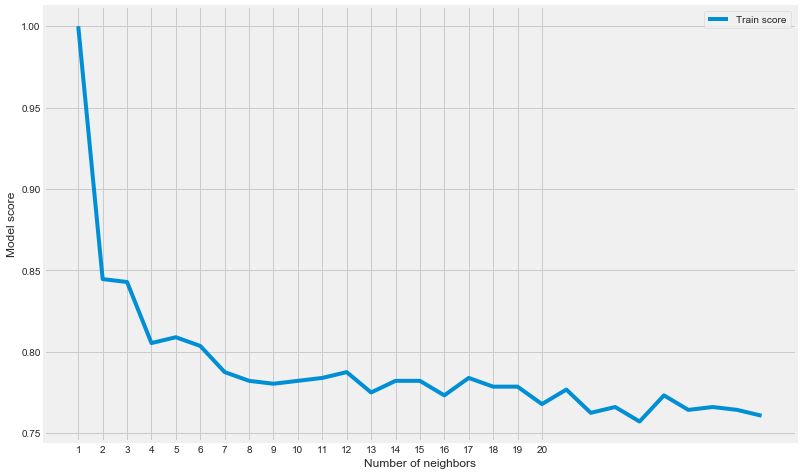

In [54]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [57]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 76.61%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.831836    0.615836    0.766071    0.723836      0.754693
precision    0.773270    0.744681    0.766071    0.758975      0.763059
recall       0.900000    0.525000    0.766071    0.712500      0.766071
support    360.000000  200.000000  560.000000  560.000000    560.000000
_______________________________________________
Confusion Matrix: 
 [[324  36]
 [ 95 105]]

Test Result:
Accuracy Score: 32.92%
_______________________________________________
CLASSIFICATION REPORT:
               0          1   micro avg   macro avg  weighted avg
f1-score     0.0   0.495298    0.329167    0.247649      0.163036
precision    0.0   0.329167    0.329167    0.164583      0.108351
recall       0.0   1.000000    0.329167    0.500000      0.329167
support    161.0  79.000000  240.000000  240.000000    240.000000
___

In [161]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,75.000000,32.916667
1,Tuned K-nearest neighbors,72.857143,32.916667


#### Support Vector Machine Hyperparameter Tuning

In [59]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 651 tasks      | elapsed:   40.6s


Best params: {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 78.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.842105    0.666667    0.785714    0.754386      0.779449
precision    0.800000    0.750000    0.785714    0.775000      0.782143
recall       0.888889    0.600000    0.785714    0.744444      0.785714
support    360.000000  200.000000  560.000000  560.000000    560.000000
_______________________________________________
Confusion Matrix: 
 [[320  40]
 [ 80 120]]

Test Result:
Accuracy Score: 67.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1   micro avg   macro avg  weighted avg
f1-score     0.802993   0.0    0.670833    0.401496      0.538674
precision    0.670833   0.0    0.670833    0.335417      0.450017
recall       1.000000   0.0    0.670833    0.500000      0.670833
support    161.

[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:  1.8min finished


In [162]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,75.000000,32.916667
1,Tuned K-nearest neighbors,72.857143,32.916667
2,Tuned Support Vector Machine,81.071429,67.083333


#### Decision Tree Classifier Hyperparameter Tuning

In [66]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 6233 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   41.7s finished


Best_params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 74.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.820839    0.576577    0.748214    0.698708      0.733602
precision    0.756440    0.721805    0.748214    0.739122      0.744070
recall       0.897222    0.480000    0.748214    0.688611      0.748214
support    360.000000  200.000000  560.000000  560.000000    560.000000
_______________________________________________
Confusion Matrix: 
 [[323  37]
 [104  96]]

Test Result:
Accuracy Score: 48.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1   micro avg   macro avg  weighted avg
f1-score     0.540741   0.409524    0.483333    0.475132      0.497549
precision    0.669725   0.328244    0.483333    0.498985      0.557321

In [163]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,75.000000,32.916667
1,Tuned K-nearest neighbors,72.857143,32.916667
2,Tuned Support Vector Machine,81.071429,67.083333
3,Tuned Decision Tree Classifier,78.750000,51.666667


#### Random Forest Classifier Hyperparameter Tuning


In [99]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=500, num=5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num=5)]
max_depth.append(None)
min_samples_split = range(50, 500, 100)
min_samples_leaf = range(50, 400, 100)
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 60.3min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 62.9min finished


Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}
Train Result:
Accuracy Score: 79.11%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.850955    0.650746    0.791071    0.750851      0.779452
precision    0.785882    0.807407    0.791071    0.796645      0.793570
recall       0.927778    0.545000    0.791071    0.736389      0.791071
support    360.000000  200.000000  560.000000  560.000000    560.000000
_______________________________________________
Confusion Matrix: 
 [[334  26]
 [ 91 109]]

Test Result:
Accuracy Score: 32.92%
_______________________________________________
CLASSIFICATION REPORT:
               0          1   micro avg   macro avg  weighted avg
f1-score     0.0   0.495298    0.329167    0.247649      0.163036
precision    0.0   0.329167    0.329167    0.164583 

In [164]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,75.000000,32.916667
1,Tuned K-nearest neighbors,72.857143,32.916667
2,Tuned Support Vector Machine,81.071429,67.083333
3,Tuned Decision Tree Classifier,78.750000,51.666667
4,Tuned Random Forest Classifier,74.821429,32.916667


#### XGBoost Classifier Hyperparameter Tuning

In [83]:
n_estimators = [500, 900, 1100, 1500]
max_depth = [3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

params_grid = {
    'n_estimators': n_estimators, 'max_depth': max_depth,
    'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
    'booster' : booster, 'base_score' : base_score
                      }

xgb_clf = XGBClassifier()

xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=3, scoring = 'accuracy',n_jobs =-1, verbose=1)


xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 2048 candidates, totalling 6144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 6144 out of 6144 | elapsed: 40.6min finished


[10:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best paramters: {'base_score': 0.25, 'booster': 'gblinear', 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 500}
[10:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "min_chil

In [165]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,75.000000,32.916667
1,Tuned K-nearest neighbors,72.857143,32.916667
2,Tuned Support Vector Machine,81.071429,67.083333
3,Tuned Decision Tree Classifier,78.750000,51.666667
4,Tuned Random Forest Classifier,74.821429,32.916667
5,Tuned XGBoost Classifier,85.178571,32.916667


In [85]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,77.142857,32.916667
1,K-nearest neighbors,80.892857,37.500000
2,Support Vector Machine,81.071429,67.083333
3,Decision Tree Classifier,100.000000,66.250000
4,Random Forest Classifier,100.000000,32.916667
5,XGBoost Classifier,100.000000,33.750000


#### Features Importance According to Random Forest and XGBoost

In [102]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

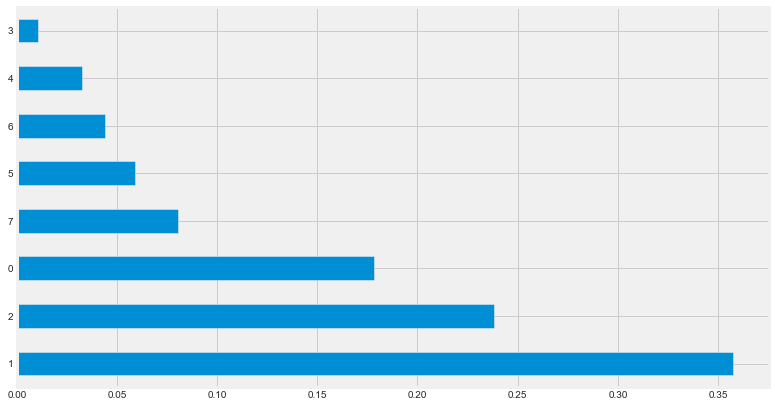

In [103]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)

### Applying Over Sampling Techniques Using SMOTE

In [11]:
# Creating new samples using SMOTE technique
from imblearn.over_sampling import SMOTE
x_resample, y_resample  = SMOTE().fit_sample(X, y.values.ravel())
print("Shape of x_resample :",x_resample.shape)
print("Shape of y_resample :",y_resample.shape)

Shape of x_resample : (1042, 8)
Shape of y_resample : (1042,)


In [12]:
# Testing balanced values
d=pd.DataFrame(y_resample, columns=['a']) 
d['a'].value_counts()

1    521
0    521
Name: a, dtype: int64

In [13]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)
print("Shape of x_train2 :", X_train2.shape)
print("Shape of y_train2 :", y_train2.shape)
print("Shape of x_test2 :", X_test2.shape)
print("Shape of y_test2 :", y_test2.shape)

Shape of x_train2 : (833, 8)
Shape of y_train2 : (833,)
Shape of x_test2 : (209, 8)
Shape of y_test2 : (209,)


In [14]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

#### Logistic Regression

In [119]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train2, y_train2)

print_score(lr_clf, X_train2, y_train2, X_test2, y_test2, train=True)
print_score(lr_clf, X_train2, y_train2, X_test2, y_test2, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters: {'C': 0.08858667904100823, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 76.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.771226    0.762836    0.767107    0.767031      0.767016
precision    0.755196    0.780000    0.767107    0.767598      0.767643
recall       0.787952    0.746411    0.767107    0.767182      0.767107
support    415.000000  418.000000  833.000000  833.000000    833.000000
_______________________________________________
Confusion Matrix: 
 [[327  88]
 [106 312]]

Test Result:
Accuracy Score: 74.64%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.753488    0.738916    0.746411    0.746202      0.746307
precision    0.743119    0.750000    0.746411    0.746560      0.746510
recall       0.764151    0.728155    0.746411    0

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [152]:
test_score = accuracy_score(y_test2, lr_clf.predict(X_test2)) * 100
train_score = accuracy_score(y_train2, lr_clf.predict(X_train2)) * 100

smote_tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression on SMOTE Samples", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
smote_tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression on SMOTE Samples,76.710684,74.641148


#### K-Nearest Neighbours Classifier

In [123]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train2, y_train2)
    train_score.append(accuracy_score(y_train2, model.predict(X_train2)))

Maximum KNN score on the test data: 100.00%


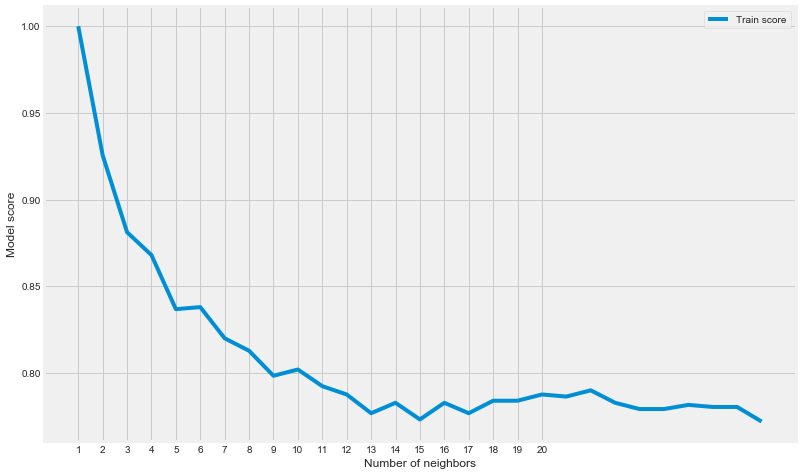

In [124]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score2, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [125]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train2, y_train2)

print_score(knn_clf, X_train2, y_train2, X_test2, y_test2, train=True)
print_score(knn_clf, X_train2, y_train2, X_test2, y_test2, train=False)

Train Result:
Accuracy Score: 78.03%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.764479    0.794151    0.780312    0.779315      0.779368
precision    0.820442    0.749469    0.780312    0.784956      0.784828
recall       0.715663    0.844498    0.780312    0.780080      0.780312
support    415.000000  418.000000  833.000000  833.000000    833.000000
_______________________________________________
Confusion Matrix: 
 [[297 118]
 [ 65 353]]

Test Result:
Accuracy Score: 77.51%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  micro avg   macro avg  weighted avg
f1-score     0.745946    0.798283    0.77512    0.772115      0.771739
precision    0.873418    0.715385    0.77512    0.794401      0.795535
recall       0.650943    0.902913    0.77512    0.776928      0.775120
support    106.000000  103.000000  209.00000  209

In [153]:
test_score = accuracy_score(y_test2, knn_clf.predict(X_test2)) * 100
train_score = accuracy_score(y_train2, knn_clf.predict(X_train2)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors on SMOTE Samples", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
smote_tuning_results_df = smote_tuning_results_df.append(results_df_2, ignore_index=True)
smote_tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression on SMOTE Samples,76.710684,74.641148
1,Tuned K-nearest neighbors on SMOTE Samples,78.031212,77.511962


#### Support Vector machine

In [130]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train2, y_train2)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train2, y_train2)

print_score(svm_clf, X_train2, y_train2, X_test2, y_test2, train=True)
print_score(svm_clf, X_train2, y_train2, X_test2, y_test2, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed:   43.8s


Best params: {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 86.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.856436    0.864802    0.860744    0.860619      0.860634
precision    0.880407    0.843182    0.860744    0.861794      0.861727
recall       0.833735    0.887560    0.860744    0.860647      0.860744
support    415.000000  418.000000  833.000000  833.000000    833.000000
_______________________________________________
Confusion Matrix: 
 [[346  69]
 [ 47 371]]

Test Result:
Accuracy Score: 80.38%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.801932    0.805687    0.803828    0.803810      0.803783
precision    0.821782    0.787037    0.803828    0.804410      0.804659
recall       0.783019    0.825243    0.803828    0.804131      0

[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:  4.6min finished


In [154]:
test_score = accuracy_score(y_test2, svm_clf.predict(X_test2)) * 100
train_score = accuracy_score(y_train2, svm_clf.predict(X_train2)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine on SMOTE Samples", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
smote_tuning_results_df = smote_tuning_results_df.append(results_df_2, ignore_index=True)
smote_tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression on SMOTE Samples,76.710684,74.641148
1,Tuned K-nearest neighbors on SMOTE Samples,78.031212,77.511962
2,Tuned Support Vector Machine on SMOTE Samples,86.074430,80.382775


#### Decision Tree Classifier

In [132]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree_cv.fit(X_train2, y_train2)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train2, y_train2)

print_score(tree_clf, X_train2, y_train2, X_test2, y_test2, train=True)
print_score(tree_clf, X_train2, y_train2, X_test2, y_test2, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 992 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 6392 tasks      | elapsed:   10.0s


Best_params: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 95.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.951792    0.954492    0.953181    0.953142      0.953147
precision    0.977157    0.931663    0.953181    0.954410      0.954328
recall       0.927711    0.978469    0.953181    0.953090      0.953181
support    415.000000  418.000000  833.000000  833.000000    833.000000
_______________________________________________
Confusion Matrix: 
 [[385  30]
 [  9 409]]

Test Result:
Accuracy Score: 70.81%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.708134    0.708134    0.708134    0.708134      0.708134
precision    0.718447    0.698113    0.708134    0.708280      0.

[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   21.5s finished


In [155]:
test_score = accuracy_score(y_test2, tree_clf.predict(X_test2)) * 100
train_score = accuracy_score(y_train2, tree_clf.predict(X_train2)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier on SMOTE Samples", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
smote_tuning_results_df = smote_tuning_results_df.append(results_df_2, ignore_index=True)
smote_tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression on SMOTE Samples,76.710684,74.641148
1,Tuned K-nearest neighbors on SMOTE Samples,78.031212,77.511962
2,Tuned Support Vector Machine on SMOTE Samples,86.074430,80.382775
3,Tuned Decision Tree Classifier on SMOTE Samples,95.318127,70.813397


#### Random Forest Classifier

In [135]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=500, num=5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num=5)]
max_depth.append(None)
min_samples_split = range(50, 500, 100)
min_samples_leaf = range(50, 400, 100)
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train2, y_train2)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train2, y_train2)

print_score(rf_clf, X_train2, y_train2, X_test2, y_test2, train=True)
print_score(rf_clf, X_train2, y_train2, X_test2, y_test2, train=False)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 55.7min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 63.6min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 66.3min finished


Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 350}
Train Result:
Accuracy Score: 81.87%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.812422    0.824623    0.818727    0.818522      0.818544
precision    0.838462    0.801354    0.818727    0.819908      0.819841
recall       0.787952    0.849282    0.818727    0.818617      0.818727
support    415.000000  418.000000  833.000000  833.000000    833.000000
_______________________________________________
Confusion Matrix: 
 [[327  88]
 [ 63 355]]

Test Result:
Accuracy Score: 78.47%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1   micro avg   macro avg  weighted avg
f1-score     0.773869    0.794521    0.784689    0.784195      0.784047
precision    0.827957    0.750000    0.7

In [156]:
test_score = accuracy_score(y_test2, rf_clf.predict(X_test2)) * 100
train_score = accuracy_score(y_train2, rf_clf.predict(X_train2)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier on SMOTE Samples", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
smote_tuning_results_df = smote_tuning_results_df.append(results_df_2, ignore_index=True)
smote_tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression on SMOTE Samples,76.710684,74.641148
1,Tuned K-nearest neighbors on SMOTE Samples,78.031212,77.511962
2,Tuned Support Vector Machine on SMOTE Samples,86.074430,80.382775
3,Tuned Decision Tree Classifier on SMOTE Samples,95.318127,70.813397
4,Tuned Random Forest Classifier on SMOTE Samples,81.872749,78.468900


#### XGBoost Classifier

In [28]:
n_estimators = [500, 900, 1100, 1500]
max_depth = [3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

params_grid = {
    'n_estimators': n_estimators, 'max_depth': max_depth,
    'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
    'booster' : booster, 'base_score' : base_score
                      }

xgb_clf = XGBClassifier()

xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=3, scoring = 'accuracy',n_jobs =-1, verbose=1)


xgb_cv.fit(X_train2, y_train2)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train2, y_train2)

print_score(xgb_clf, X_train2, y_train2, X_test2, y_test2, train=True)
print_score(xgb_clf, X_train2, y_train2, X_test2, y_test2, train=False)

Fitting 3 folds for each of 2048 candidates, totalling 6144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 48.5min
[Parallel(n_jobs=-1)]: Done 6144 out of 6144 | elapsed: 48.9min finished
C:\Users\Hi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a fut

[11:45:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best paramters: {'base_score': 0.5, 'booster': 'gbtree', 'learning_rate': 0.15, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 500}
[11:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  micro avg  macro avg  weighted avg
f1-score     1.0    1.0        1.0        1.0           1.0
precision 

In [157]:
test_score = accuracy_score(y_test2, xgb_clf.predict(X_test2)) * 100
train_score = accuracy_score(y_train2, xgb_clf.predict(X_train2)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier on SMOTE Samples", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
smote_tuning_results_df = smote_tuning_results_df.append(results_df_2, ignore_index=True)
smote_tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression on SMOTE Samples,76.710684,74.641148
1,Tuned K-nearest neighbors on SMOTE Samples,78.031212,77.511962
2,Tuned Support Vector Machine on SMOTE Samples,86.074430,80.382775
3,Tuned Decision Tree Classifier on SMOTE Samples,95.318127,70.813397
4,Tuned Random Forest Classifier on SMOTE Samples,81.872749,78.468900
5,Tuned XGBoost Classifier on SMOTE Samples,100.000000,84.210526


In [166]:
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,75.000000,32.916667
1,Tuned K-nearest neighbors,72.857143,32.916667
2,Tuned Support Vector Machine,81.071429,67.083333
3,Tuned Decision Tree Classifier,78.750000,51.666667
4,Tuned Random Forest Classifier,74.821429,32.916667
5,Tuned XGBoost Classifier,85.178571,32.916667


In [159]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,77.142857,32.916667
1,K-nearest neighbors,80.892857,37.500000
2,Support Vector Machine,81.071429,67.083333
3,Decision Tree Classifier,100.000000,66.250000
4,Random Forest Classifier,100.000000,32.916667
5,XGBoost Classifier,100.000000,33.750000


#### From all the above modelling analysis, we can Summarize that TUNED XGBoost CLASSIFIER on SMOTE DATA is yielding the best results with an accuracy of 84% on test data along with  F1 Score, recall and precision above 80% each

In [21]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [26]:
X.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking'],
      dtype='object')

In [27]:
xgb_clf.feature_importances_

array([0.14855972, 0.2540096 , 0.13159396, 0.0777756 , 0.1267559 ,
       0.08596697, 0.08264167, 0.0926966 ], dtype=float32)

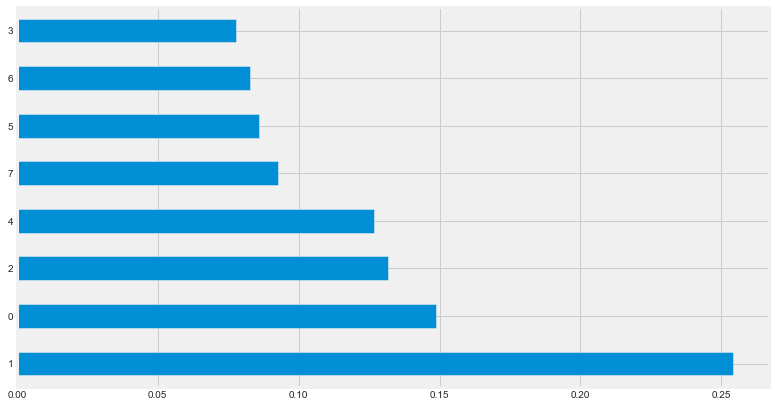

In [23]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False)

In [167]:
zeta_pred_data = pd.read_csv("2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv")

In [168]:
zeta_pred_data.isnull().sum()

age                    0
weight                 0
bmi                    0
blood_pressure         0
insulin_test           0
liver_stress_test      0
cardio_stress_test     0
years_smoking          0
zeta_disease          20
dtype: int64

In [169]:
# Putting feature variable to X
X_pred = zeta_pred_data.drop(['zeta_disease'], axis=1)

X_pred.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,24,151,39.5,69,72,1.3968,56,4
1,27,179,35.5,89,156,1.6608,43,6
2,34,147,26.9,76,74,1.6958,53,2
3,35,206,32.4,73,127,1.4608,61,6
4,60,193,29.8,62,192,1.7798,65,9


In [170]:
# Putting response variable to y
y_pred = zeta_pred_data['zeta_disease']

y_pred.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: zeta_disease, dtype: float64

In [171]:
X_pred[col_to_scale] = scaler.fit_transform(X_pred[col_to_scale])

X_pred.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,-0.958114,-1.021011,0.776978,-0.695919,-0.986618,-0.769630,-0.629119,-0.605897
1,-0.690733,0.007345,0.157872,0.769174,0.147891,0.406194,-2.003665,-0.014778
2,-0.066845,-1.167919,-1.173206,-0.183137,-0.959605,0.562079,-0.946322,-1.197015
3,0.022282,0.998974,-0.321935,-0.402901,-0.243784,-0.484582,-0.100448,-0.014778
4,2.250454,0.521523,-0.724354,-1.208702,0.634109,0.936205,0.322490,0.871900


In [175]:
y_pred = xgb_clf.predict(X_pred)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [177]:
y_pred = pd.DataFrame(y_pred)
# Renaming the column 
y_pred= y_pred.rename(columns={ 0 : 'zeta_disease'})
y_pred

,zeta_disease
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [179]:
ZetaDiseasedf = zeta_pred_data.drop(['zeta_disease'], axis=1)
ZetaDiseasedf

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,24,151,39.5,69,72,1.3968,56,4
1,27,179,35.5,89,156,1.6608,43,6
2,34,147,26.9,76,74,1.6958,53,2
3,35,206,32.4,73,127,1.4608,61,6
4,60,193,29.8,62,192,1.7798,65,9
5,45,120,36.5,108,50,1.2978,54,12
6,20,139,38.2,61,77,1.5818,68,3
7,23,137,31.2,70,73,1.4168,59,7
8,36,195,30.5,59,141,1.4498,59,6
9,19,193,25.8,84,66,1.7938,50,3


In [180]:
# Appending predicted column to the actual data
ZetaDiseasedf = pd.concat([ZetaDiseasedf, y_pred],axis=1)
ZetaDiseasedf

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,0
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,0
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,1
9,19,193,25.8,84,66,1.7938,50,3,0
